# Step 1: Import Required Libraries

In this section, we import all necessary libraries for:

- Data manipulation =>pandas, numpy  
- Visualization => matplotlib, seaborn  
- Missing value handling => SimpleImputer, KNNImputer, IterativeImputer  
- Encoding => OneHotEncoder, OrdinalEncoder, LabelEncoder  
- Scaling => StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler  
- Feature transformation => PowerTransformer, FunctionTransformer  
- Outlier detection => scipy.stats  
- Pipeline creation => ColumnTransformer, Pipeline  
- Binning => KMeans  

These libraries will help us build a complete end-to-end preprocessing pipeline.
These libraries will use as they are needed


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Step 2: Data Acquisition

The dataset is collected from multiple sources:

- CSV file → Main transaction data  
- JSON file → Customer metadata  (Not used)
- SQL database → Repayment history  (Not used)

After loading all sources, we merge them using `customer_id` to create one unified dataset.

In [3]:
filelocation = r"E:\Rnw\python\Final_project\customer_credit_risk_500k.csv"
df = pd.read_csv(filelocation)
df.head()

,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,join_date,default_flag
0,100000,59.0,Female,East,Secondary,Salaried,2.400795e+05,92740.780161,Education,784.170707,1,53,41.296668,2016-10-06,0
1,100001,49.0,Female,South,Graduate,Self-Employed,4.389233e+05,64315.332332,Car,589.698466,1,62,12.192453,2022-04-01,0
2,100002,35.0,Female,North,Secondary,Salaried,4.241221e+05,632481.938730,Home,625.789192,2,45,23.680727,2024-12-24,0
3,100003,63.0,Female,North,Secondary,Salaried,3.222749e+05,118465.971789,Car,627.479500,2,57,32.661094,2021-03-17,0
4,100004,28.0,Female,East,Graduate,Self-Employed,1.371926e+06,131836.274600,Car,803.177705,1,46,15.402834,2024-04-25,1


# Step 3: Data Understanding

We perform initial exploration using:

- `.info()` → Understand data types & missing values  
- `.describe()` → Summary statistics  
- `.isnull().sum()` → Count missing values  

This step helps identify data quality issues.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        500000 non-null  int64  
 1   age                475000 non-null  float64
 2   gender             475000 non-null  object 
 3   region             500000 non-null  object 
 4   education_level    500000 non-null  object 
 5   employment_type    475000 non-null  object 
 6   annual_income      475000 non-null  float64
 7   loan_amount        500000 non-null  float64
 8   loan_purpose       500000 non-null  object 
 9   credit_score       475000 non-null  float64
 10  repayment_history  500000 non-null  int64  
 11  transaction_count  500000 non-null  int64  
 12  spending_ratio     500000 non-null  float64
 13  join_date          500000 non-null  object 
 14  default_flag       500000 non-null  int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 57

In [ ]:
df.describe()

,customer_id,age,annual_income,loan_amount,credit_score,repayment_history,transaction_count,spending_ratio,default_flag
count,500000.000000,475000.000000,4.750000e+05,5.000000e+05,475000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,349999.500000,45.011236,5.497334e+05,2.242788e+05,649.870773,1.999366,50.008804,40.086244,0.151130
std,144337.711635,14.134525,4.394833e+05,2.121152e+05,79.530056,1.414278,7.063937,14.875279,0.358176
min,100000.000000,21.000000,1.570025e+04,3.331737e+03,300.000000,0.000000,20.000000,5.000000,0.000000
25%,224999.750000,33.000000,2.962467e+05,9.522698e+04,596.004894,1.000000,45.000000,29.925094,0.000000
50%,349999.500000,45.000000,4.453717e+05,1.629643e+05,649.927856,2.000000,50.000000,40.016132,0.000000
75%,474999.250000,57.000000,6.706867e+05,2.794298e+05,703.837988,3.000000,55.000000,50.155434,0.000000
max,599999.000000,69.000000,1.622835e+07,7.449222e+06,850.000000,13.000000,85.000000,100.000000,1.000000


In [ ]:
colunm_name = df.columns


In [ ]:
df["annual_income"] = df["annual_income"].round(2)
df["loan_amount"] = df["loan_amount"].round(2)
df["credit_score"] = df["credit_score"].round(2)
df["spending_ratio"] = df["spending_ratio"].round(2)


In [ ]:
df.head()

,customer_id,age,gender,region,education_level,employment_type,annual_income,loan_amount,loan_purpose,credit_score,repayment_history,transaction_count,spending_ratio,join_date,default_flag
0,100000,59.0,Female,East,Secondary,Salaried,240079.54,92740.78,Education,784.17,1,53,41.30,2016-10-06,0
1,100001,49.0,Female,South,Graduate,Self-Employed,438923.30,64315.33,Car,589.70,1,62,12.19,2022-04-01,0
2,100002,35.0,Female,North,Secondary,Salaried,424122.06,632481.94,Home,625.79,2,45,23.68,2024-12-24,0
3,100003,63.0,Female,North,Secondary,Salaried,322274.92,118465.97,Car,627.48,2,57,32.66,2021-03-17,0
4,100004,28.0,Female,East,Graduate,Self-Employed,1371925.76,131836.27,Car,803.18,1,46,15.40,2024-04-25,1


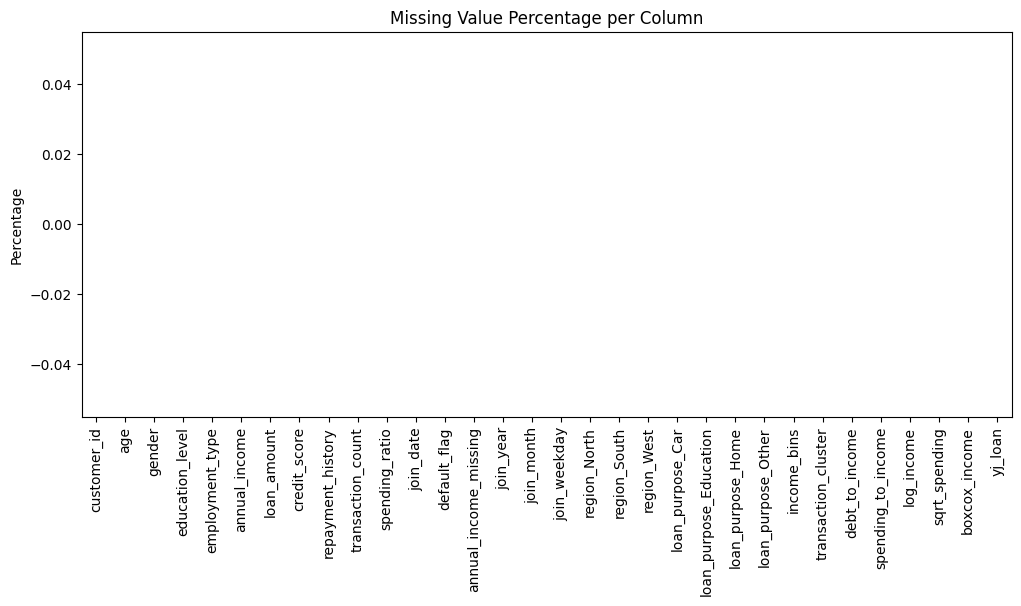

In [51]:
missing_percentage = df.isnull().mean() * 100

missing_percentage.sort_values(ascending=False).plot(
    kind="bar", figsize=(12,5)
)
plt.title("Missing Value Percentage per Column")
plt.ylabel("Percentage")
plt.show()

# Step 4: Missing Value Percentage

We calculate the percentage of missing values in each column.
This helps prioritize which columns require imputation.

In [ ]:
missing_percentage = df.isnull().mean() * 100
missing_percentage

customer_id          0.0
age                  5.0
gender               5.0
region               0.0
education_level      0.0
employment_type      5.0
annual_income        5.0
loan_amount          0.0
loan_purpose         0.0
credit_score         5.0
repayment_history    0.0
transaction_count    0.0
spending_ratio       0.0
join_date            0.0
default_flag         0.0
dtype: float64

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file("coustomer_credit_risk.html")


e:\Rnw\dataprofiler\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 73.36it/s]


In [ ]:
g = sns.pairplot(df, hue="loan_purpose")


In [ ]:
g.savefig("pairplot.png", dpi=300, bbox_inches="tight")

In [6]:
plt.show()

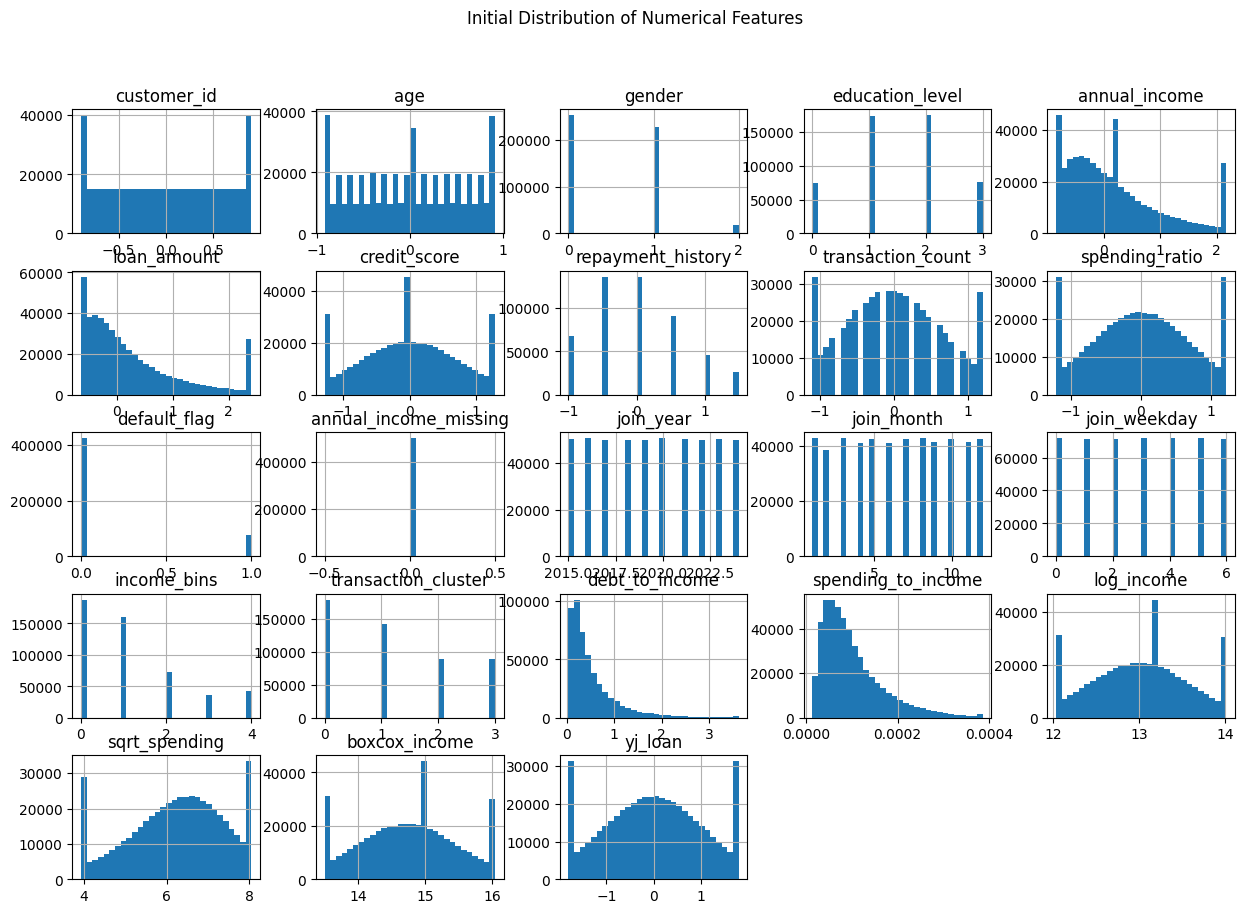

In [48]:
num_cols = df.select_dtypes(include=np.number).columns

df[num_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Initial Distribution of Numerical Features")
plt.show()

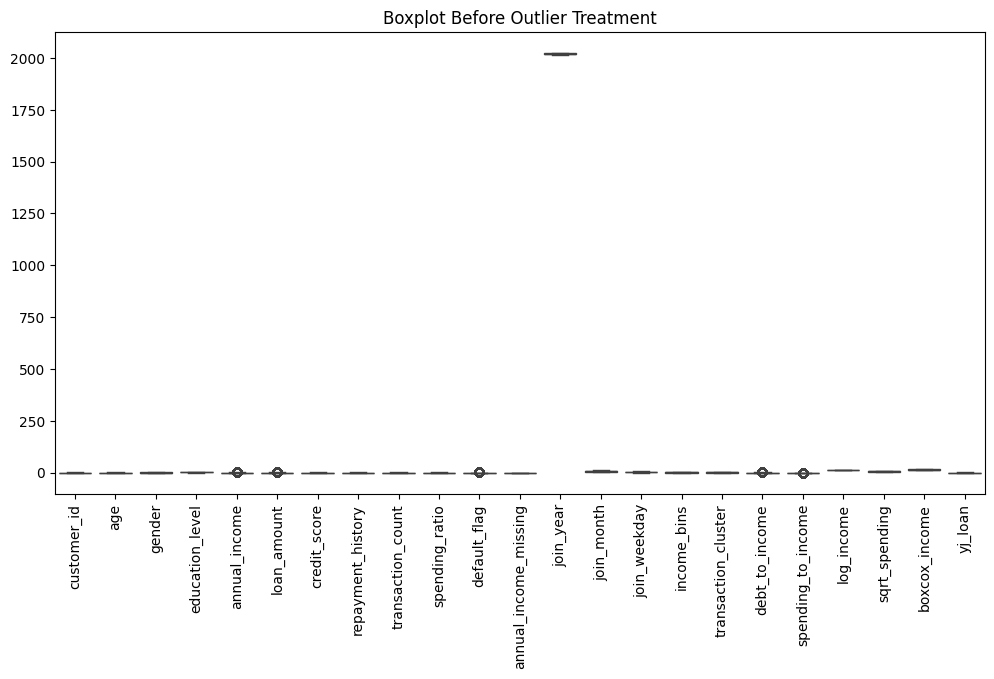

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot Before Outlier Treatment")
plt.xticks(rotation=90)
plt.show()

## Simple Imputer (Numerical)

We replace missing numerical values using the **mean** strategy.
This is suitable when data is normally distributed.


In [7]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Simple Imputer (Categorical)

Missing categorical values are replaced using the most frequent category (mode).

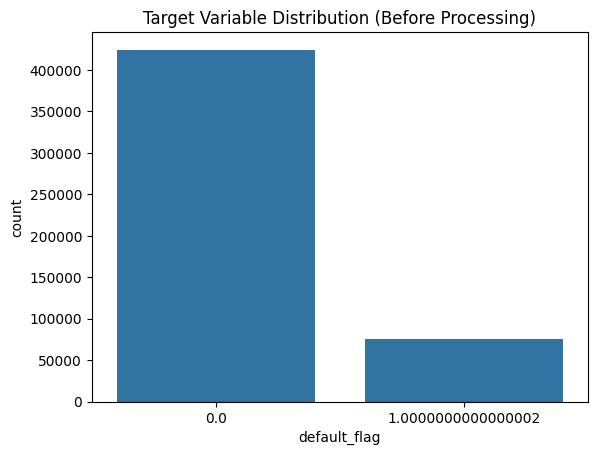

In [49]:
sns.countplot(x="default_flag", data=df)
plt.title("Target Variable Distribution (Before Processing)")
plt.show()

In [9]:
num_cols = df.select_dtypes(include=np.number).columns

num_imputer = SimpleImputer(strategy="mean")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [10]:
cat_cols = df.select_dtypes(include="object").columns

cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [11]:
# Missing indicator
df['annual_income_missing'] = df['annual_income'].isnull().astype(int)

# Count missing
n_missing = df['annual_income'].isnull().sum()

# Sample only for missing values
random_values = df['annual_income'].dropna().sample(n_missing, replace=True).values

# Fill only missing rows
df.loc[df['annual_income'].isnull(), 'annual_income'] = random_values

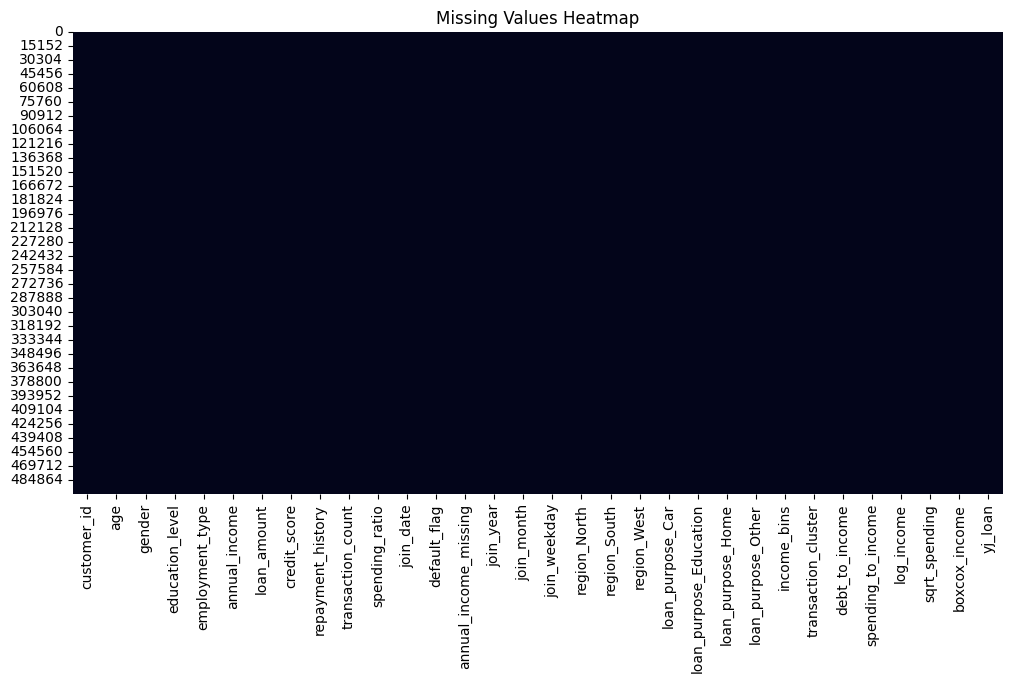

In [50]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

## KNN Imputer

KNN Imputation fills missing values based on similarity between rows.
It uses nearest neighbors to estimate missing values.

In [12]:
knn_imputer = KNNImputer(n_neighbors=5)
df[num_cols] = knn_imputer.fit_transform(df[num_cols])

## MICE Imputation

MICE (Multiple Imputation by Chained Equations) predicts missing values
using other features iteratively.

In [13]:
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
df[num_cols] = mice_imputer.fit_transform(df[num_cols])

In [14]:
df_drop = df.dropna()

In [15]:
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans


## Z-Score Method

Observations with Z-score greater than 3 are considered outliers.

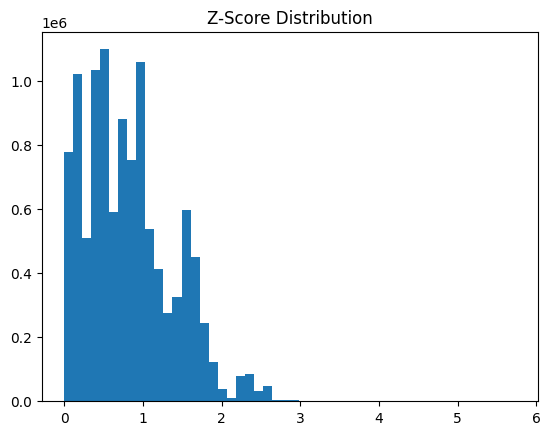

In [55]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[num_cols]))

plt.hist(z_scores.flatten(), bins=50)
plt.title("Z-Score Distribution")
plt.show()

In [16]:
z_scores = np.abs(stats.zscore(df[num_cols]))
df_z = df[(z_scores < 3).all(axis=1)]

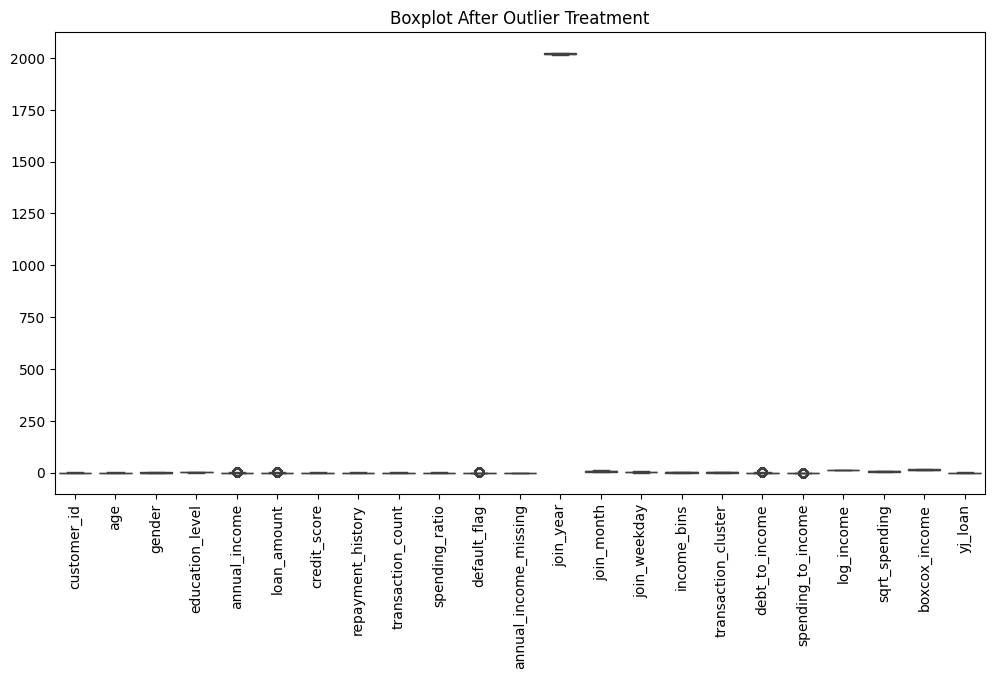

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot After Outlier Treatment")
plt.xticks(rotation=90)
plt.show()

In [57]:
df[num_cols].skew().sort_values(ascending=False)

debt_to_income           2.356647
default_flag             1.948045
spending_to_income       1.405777
loan_amount              1.191295
annual_income            0.972872
income_bins              0.954383
gender                   0.490466
repayment_history        0.441248
transaction_cluster      0.440834
transaction_count        0.097365
credit_score             0.005244
spending_ratio           0.001870
annual_income_missing    0.000000
customer_id              0.000000
yj_loan                 -0.000074
join_year               -0.000098
age                     -0.001465
join_weekday            -0.002511
boxcox_income           -0.002555
education_level         -0.002605
join_month              -0.011628
log_income              -0.021646
sqrt_spending           -0.333517
dtype: float64

## IQR Method

Outliers are values outside:
Q1 - 1.5*IQR  OR  Q3 + 1.5*IQR

In [17]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_iqr = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |
              (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
for col in num_cols:
    df[col] = stats.mstats.winsorize(df[col], limits=[0.05, 0.05])

# Date Feature Engineering

We extract:
- Year
- Month
- Weekday

from the `join_date` column.

In [19]:
df['join_date'] = pd.to_datetime(df['join_date'])

df['join_year'] = df['join_date'].dt.year
df['join_month'] = df['join_date'].dt.month
df['join_weekday'] = df['join_date'].dt.weekday

In [20]:
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    LabelEncoder,
    StandardScaler,
    MinMaxScaler,
    MaxAbsScaler,
    RobustScaler,
    PowerTransformer,
    FunctionTransformer
)


## Ordinal Encoding

Education levels have natural order:
Primary < Secondary < Graduate < Post-Graduate


In [60]:
sns.countplot(x="region", data=df)
plt.title("Region Distribution Before Encoding")
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret value `region` for `x`. An entry with this name does not appear in `data`.

In [21]:
edu_order = ['Primary', 'Secondary', 'Graduate', 'Post-Graduate']
ordinal_encoder = OrdinalEncoder(categories=[edu_order])

df['education_level'] = ordinal_encoder.fit_transform(
    df[['education_level']]
)

## Label Encoding

Used for binary categorical variable (e.g., gender).

In [22]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

## One-Hot Encoding

Used for nominal categorical variables such as:
- region
- loan_purpose

In [23]:
df = pd.get_dummies(df, columns=['region', 'loan_purpose'], drop_first=True)

In [24]:
df['income_bins'] = pd.cut(df['annual_income'], bins=5, labels=False)

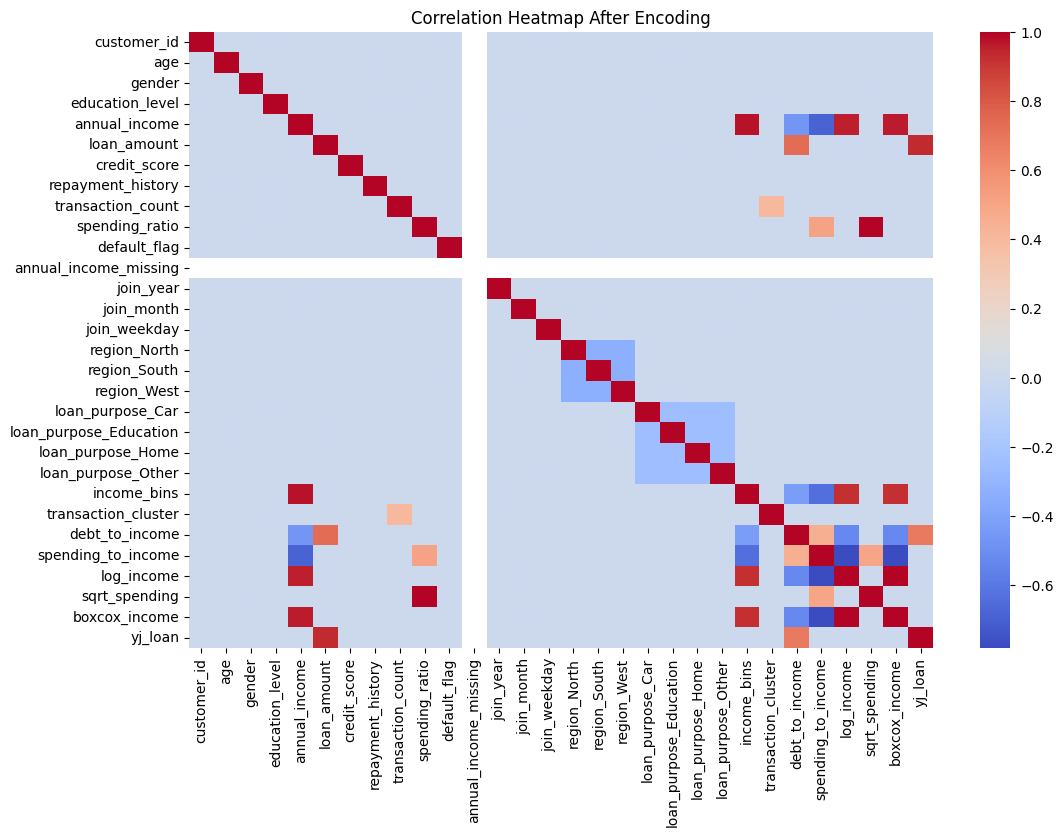

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Heatmap After Encoding")
plt.show()

In [25]:
kmeans = KMeans(n_clusters=4, random_state=0)
df['transaction_cluster'] = kmeans.fit_predict(
    df[['transaction_count']]
)

## Feature Construction: Debt-to-Income Ratio

This feature measures financial burden and is highly predictive
for loan default modeling.

In [26]:
df['debt_to_income'] = df['loan_amount'] / df['annual_income']

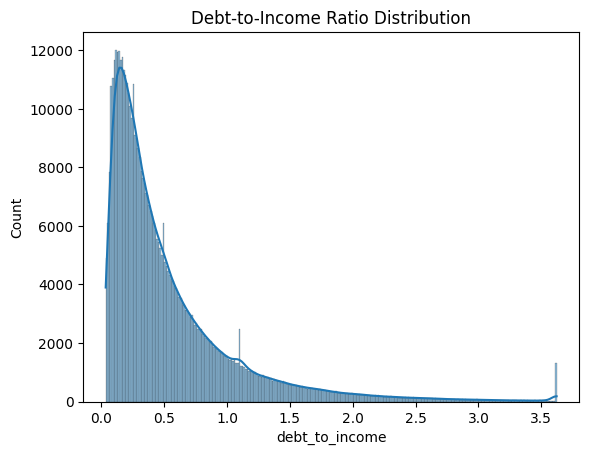

In [62]:
sns.histplot(df["debt_to_income"], kde=True)
plt.title("Debt-to-Income Ratio Distribution")
plt.show()

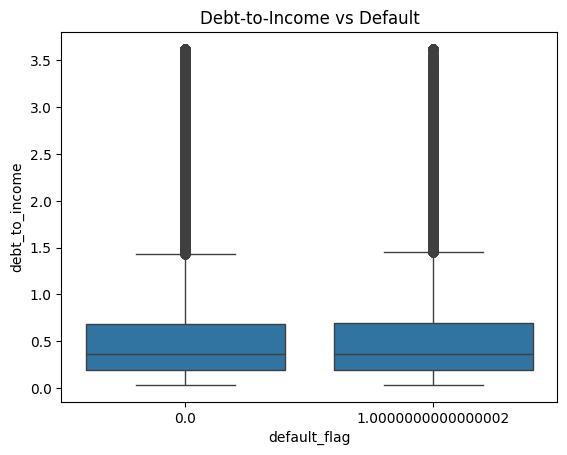

In [63]:
sns.boxplot(x="default_flag", y="debt_to_income", data=df)
plt.title("Debt-to-Income vs Default")
plt.show()

In [27]:
df['spending_to_income'] = df['spending_ratio'] / df['annual_income']

## Log Transformation

Used to reduce skewness in highly skewed numerical features.

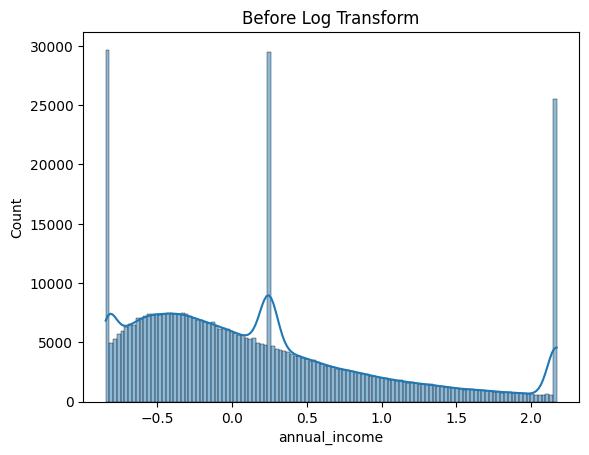

In [58]:
sns.histplot(df["annual_income"], kde=True)
plt.title("Before Log Transform")
plt.show()

In [28]:
df['log_income'] = np.log1p(df['annual_income'])

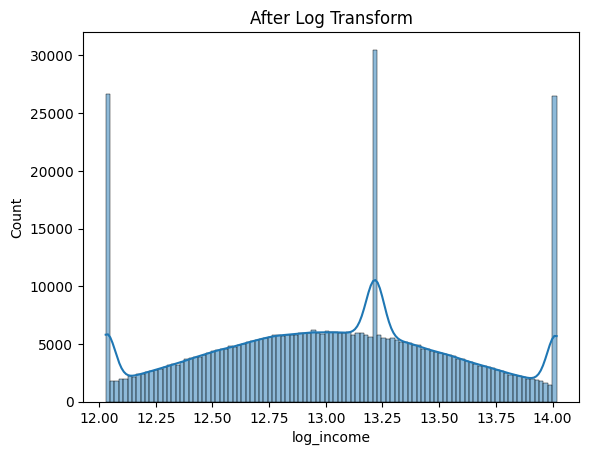

In [59]:
sns.histplot(df["log_income"], kde=True)
plt.title("After Log Transform")
plt.show()

In [29]:
df['sqrt_spending'] = np.sqrt(df['spending_ratio'])

## Box-Cox Transformation

Applies power transformation to make data more normally distributed.
Works only on positive values.

In [30]:
df['boxcox_income'], _ = stats.boxcox(df['annual_income'] + 1)

In [31]:
pt = PowerTransformer(method='yeo-johnson')
df['yj_loan'] = pt.fit_transform(df[['loan_amount']])

## Standardization (Z-Score Scaling)

Centers data around mean 0 and standard deviation 1.

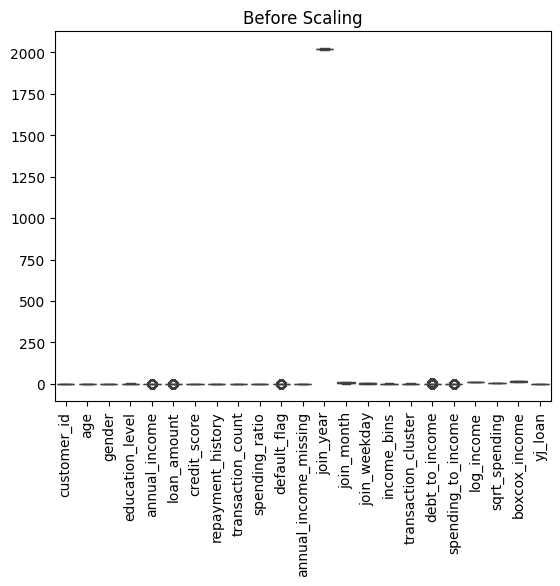

In [65]:
sns.boxplot(data=df[num_cols])
plt.title("Before Scaling")
plt.xticks(rotation=90)
plt.show()

In [32]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

## Min-Max Scaling

Scales values between 0 and 1.

In [33]:
minmax = MinMaxScaler()
df[num_cols] = minmax.fit_transform(df[num_cols])

In [34]:
robust = RobustScaler()
df[num_cols] = robust.fit_transform(df[num_cols])

In [ ]:
scaled_df = pd.DataFrame(
    StandardScaler().fit_transform(df[num_cols]),
    columns=num_cols
)

sns.boxplot(data=scaled_df)
plt.title("After Standard Scaling")
plt.xticks(rotation=90)
plt.show()

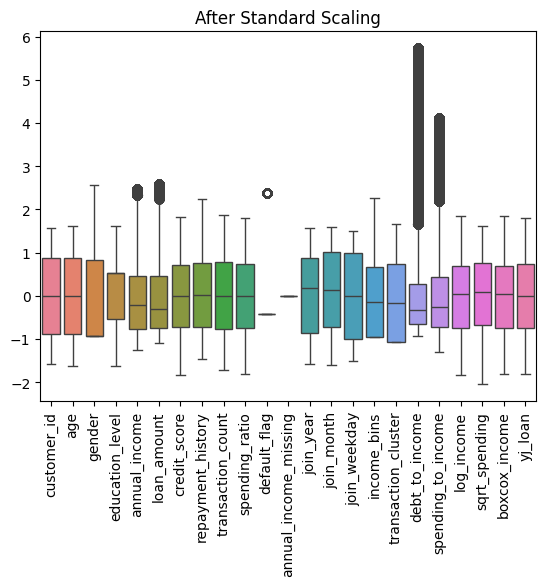

In [66]:
scaled_df = pd.DataFrame(
    StandardScaler().fit_transform(df[num_cols]),
    columns=num_cols
)

sns.boxplot(data=scaled_df)
plt.title("After Standard Scaling")
plt.xticks(rotation=90)
plt.show()

# Final Preprocessing Pipeline

We use ColumnTransformer to:

- Scale numerical features
- One-Hot Encode categorical features

This ensures a clean and production-ready pipeline.

In [44]:
y = df["default_flag"]
X = df.drop("default_flag", axis=1)

# Now detect features from X (NOT df)
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_transformed = pipeline.fit_transform(X)

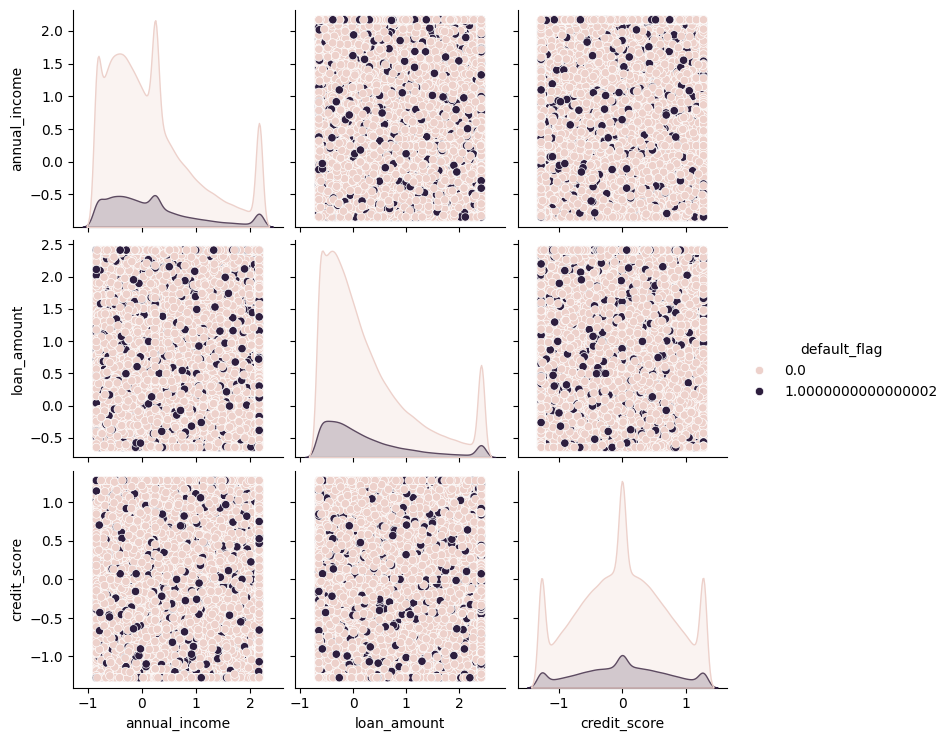

In [67]:
sns.pairplot(df[["annual_income", "loan_amount", 
                 "credit_score", "default_flag"]],
             hue="default_flag")
plt.show()

In [41]:
df.head()

,customer_id,age,gender,education_level,employment_type,annual_income,loan_amount,credit_score,repayment_history,transaction_count,...,loan_purpose_Home,loan_purpose_Other,income_bins,transaction_cluster,debt_to_income,spending_to_income,log_income,sqrt_spending,boxcox_income,yj_loan
0,-0.9,0.582865,0,1.0,Salaried,-0.636923,-0.381229,1.283177,-0.5,0.3,...,False,False,0,1,0.386292,0.000172,12.388730,6.426248,13.952983,-0.773990
1,-0.9,0.166199,0,2.0,Self-Employed,-0.069957,-0.535545,-0.594301,-0.5,1.2,...,False,False,1,3,0.146530,0.000035,12.992082,3.920882,14.719202,-1.276158
2,-0.9,-0.417135,0,1.0,Salaried,-0.112160,2.409076,-0.237846,0.0,-0.5,...,True,False,1,0,1.430538,0.000056,12.957779,4.866285,14.675405,1.804082
3,-0.9,0.749532,0,1.0,Salaried,-0.402558,-0.241572,-0.221151,0.0,0.7,...,False,False,0,3,0.367593,0.000101,12.683163,5.714989,14.325807,-0.438061
4,-0.9,-0.708801,0,2.0,Self-Employed,2.169828,-0.168988,1.283177,-0.5,-0.4,...,False,False,4,0,0.107670,0.000013,14.018002,3.924644,16.042206,-0.291319


# Final Dataset Ready for Machine Learning

The dataset is now:

- Cleaned
- Encoded
- Scaled
- Transformed
- Feature-engineered

It is fully ready for ML model training.

In [46]:
print("Final Shape:", X_transformed.shape)

Final Shape: (500000, 25)
